# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [104]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

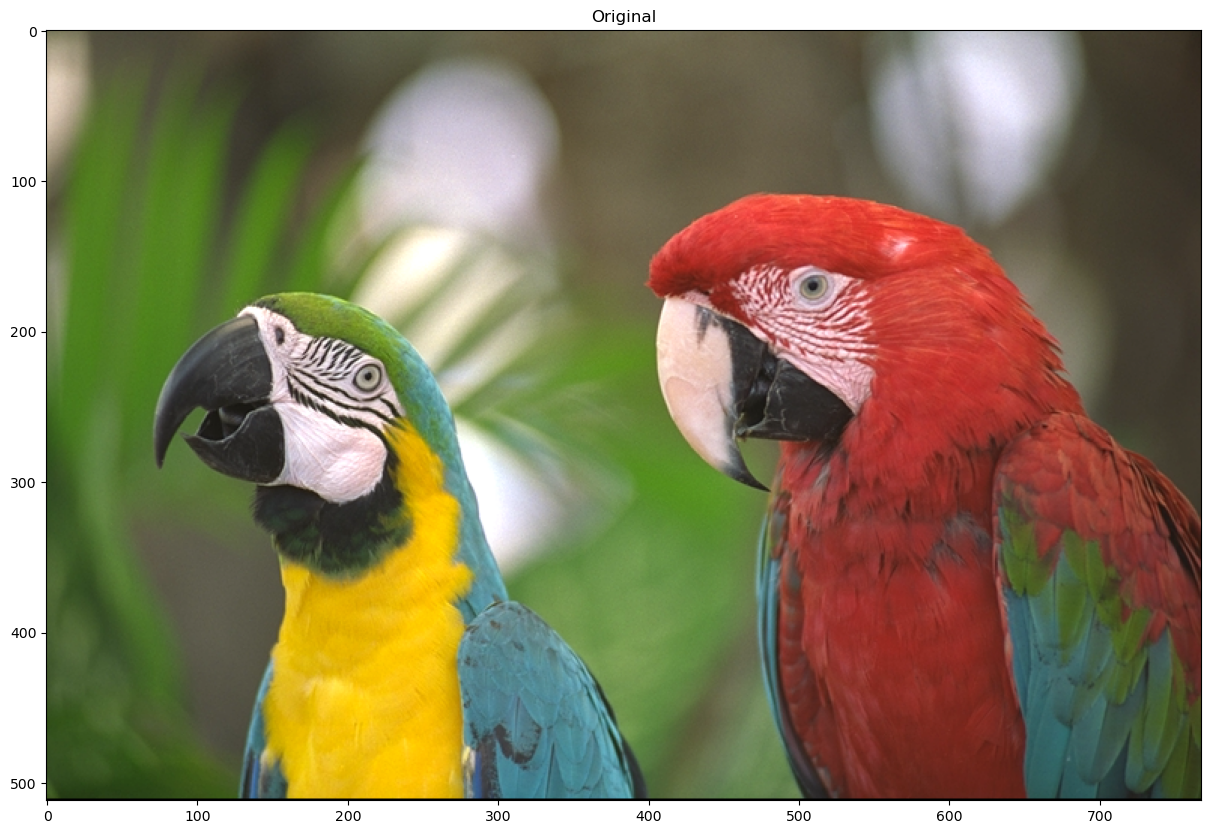

In [105]:
# Load image
img = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)
plt.title('Original')
plt.show()

Let's start with gray tones first.

In [106]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [107]:
# Cast the image to float
def quantize_image(img, colors):
    img_float = img.astype(np.float32)
    # Prepare for quantization
    rows, cols, channels = img.shape
    quantized = np.zeros_like(img)

    for r in range(rows):
        for c in range(cols):
            # Extract the original pixel value
            pixel = img_float[r, c, :]
            
            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here  
            distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
            new_pixel = colors[np.argmin(distances)]
            
            # Apply quantization
            quantized[r, c, :] = new_pixel

     # Compute average quantization error
    avg_quant_error = np.mean(np.abs(img_float - quantized))
    print("Average Quantization Error for Optimally Quantized Image:", avg_quant_error)
    return quantized.astype(np.uint8)
    
# Apply quantization
quantized = quantize_image(img, colors)

Average Quantization Error for Optimally Quantized Image: 32.75775


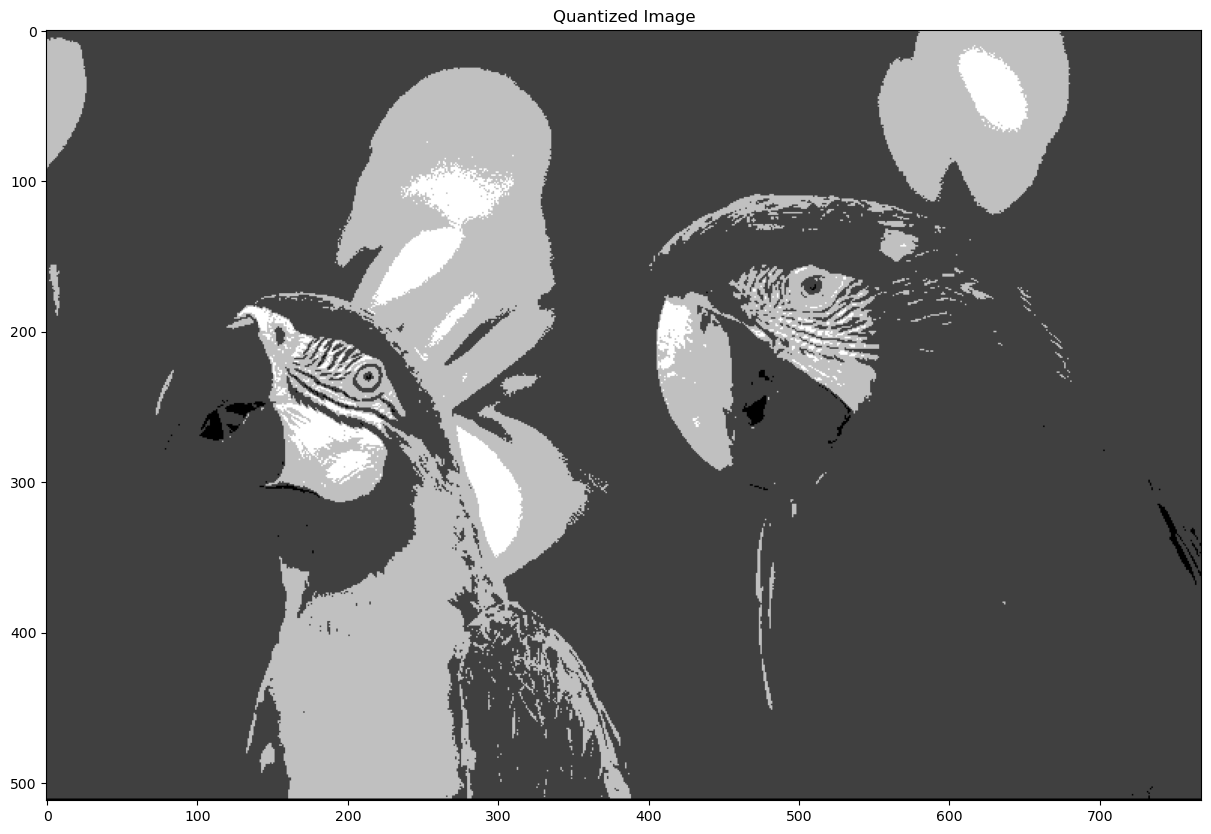

In [108]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))
plt.title('Quantized Image')
plt.show()

#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [109]:
# I will make a separate function as it will be reused more than once
def floyd_steinberg_dithering(img, colors):
    img_float = img.astype(np.float32)
    rows, cols, channels = img.shape
    # Make a temporal copy of the original image, we will need it for error diffusion
    img_tmp = np.copy(img_float)
    dithering = np.zeros_like(img)
    
    for r in range(rows):
        for c in range(cols):
            pixel = img_tmp[r, c, :]

            # Find the closest colour from the pallette (using Euclidean distance)
            distances = np.sqrt(np.sum((colors - pixel) ** 2, axis=1))
            new_pixel = colors[np.argmin(distances)]

            # Compute quantization error
            quant_error = pixel - new_pixel

            # Diffuse the quantization error according to the FS diffusion matrix
            # Note: You may need more than one line of code here
            if c + 1 < cols:
                img_tmp[r, c + 1, :] += quant_error * 7 / 16
            if r + 1 < rows and c - 1 >= 0:
                img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
            if r + 1 < rows:
                img_tmp[r + 1, c, :] += quant_error * 5 / 16
            if r + 1 < rows and c + 1 < cols:
                img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16

            # Apply dithering
            dithering[r, c, :] = new_pixel

    # Compute average quantization error for dithered image
    avg_dith_error = np.mean(np.abs(img_float - dithering))
    print("Average Quantization Error for Dithered Image:", avg_dith_error)
            
    return dithering.astype(np.uint8)

# Apply Floyd-Steinberg Dithering
dithering = floyd_steinberg_dithering(img, colors)

Average Quantization Error for Dithered Image: 41.60297


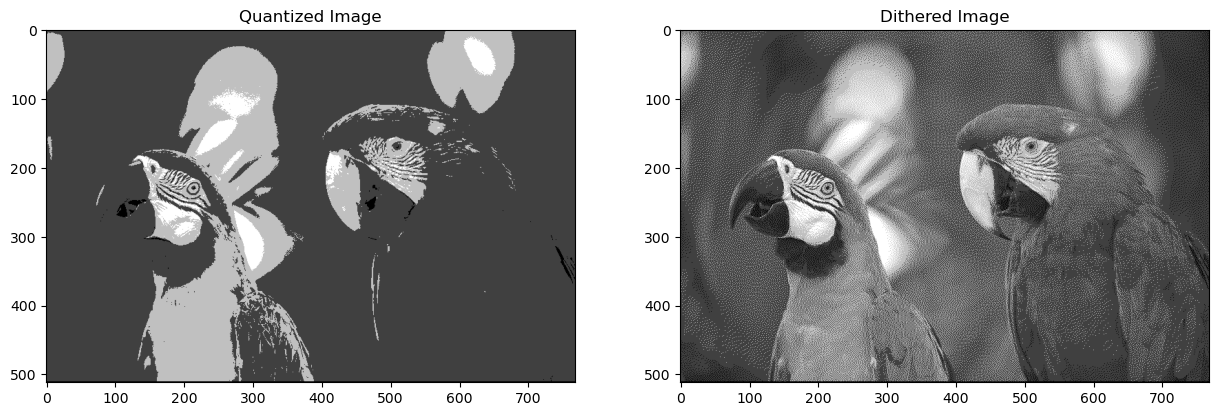

In [110]:
# Show dithered image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8)) # optimally quantized
plt.title('Quantized Image')
plt.subplot(122), plt.imshow(dithering.astype(np.uint8)) # dithering
plt.title('Dithered Image')
plt.show()

### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
    - Dithered (41.60297 vs 32.75775)
* Which image looks better to you?
    - Dithered
* Can you repeat the same process using only two colours: black and white? Show me :-)

Average Quantization Error for Optimally Quantized Image: 82.05588
Average Quantization Error for Dithered Image: 106.24885


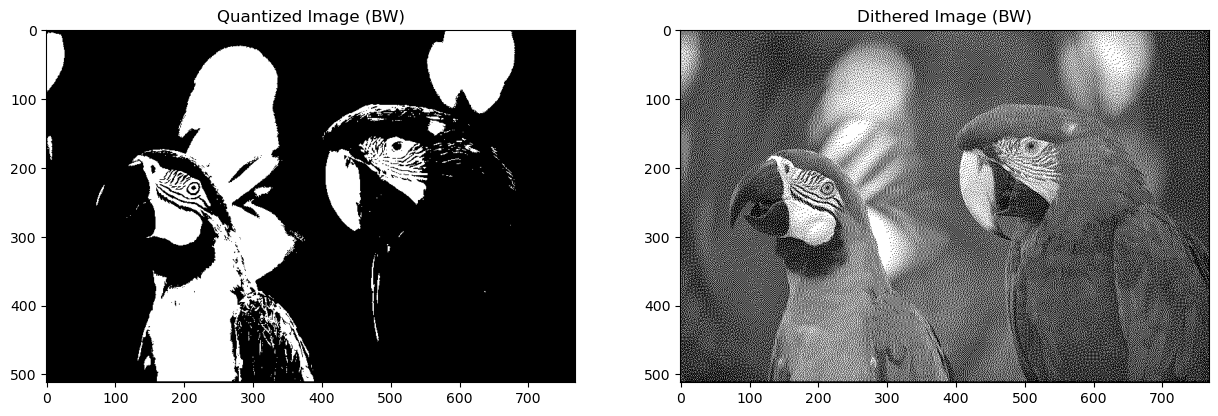

In [111]:
### Black and white process (BW)

rows, cols, channels = img.shape

# Black and white palette
colors_bw = np.array([[0, 0, 0], [255, 255, 255]])

# Quantize the original image
quantized_bw = quantize_image(img, colors_bw)

# Apply Floyd-Steinberg Dithering
dithering_bw = floyd_steinberg_dithering(img, colors_bw)

# Display results
plt.subplot(121), plt.imshow(quantized_bw.astype(np.uint8))
plt.title('Quantized Image (BW)')
plt.subplot(122), plt.imshow(dithering_bw.astype(np.uint8))
plt.title('Dithered Image (BW)')
plt.show()

### Bonus Points

Repeat the homework using a different image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [112]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
kMean_colors = kmeans.cluster_centers_

Apply FS dithering the same way you did before.

Average Quantization Error for Optimally Quantized Image: 9.202576


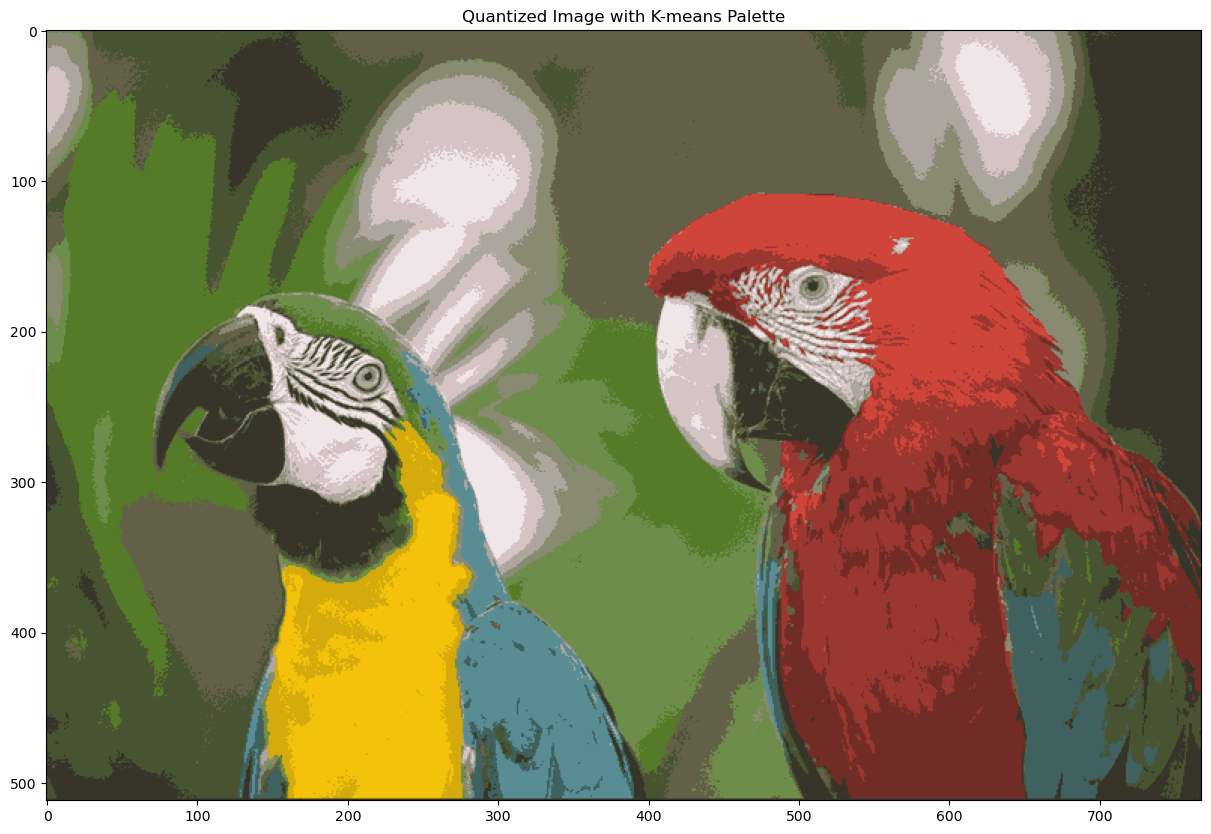

In [113]:
# Using the optimal colour palette from k-means
quantized_kmeans = quantize_image(img, kMean_colors)

# Show quantized image with k-means palette (don't forget to cast back to uint8)
plt.imshow(quantized_kmeans.astype(np.uint8))
plt.title('Quantized Image with K-means Palette')
plt.show()

In [116]:
# Apply Floyd-Steinberg Dithering
dithering_kmeans = floyd_steinberg_dithering(img, kMean_colors)

Average Quantization Error for Dithered Image: 15.980974


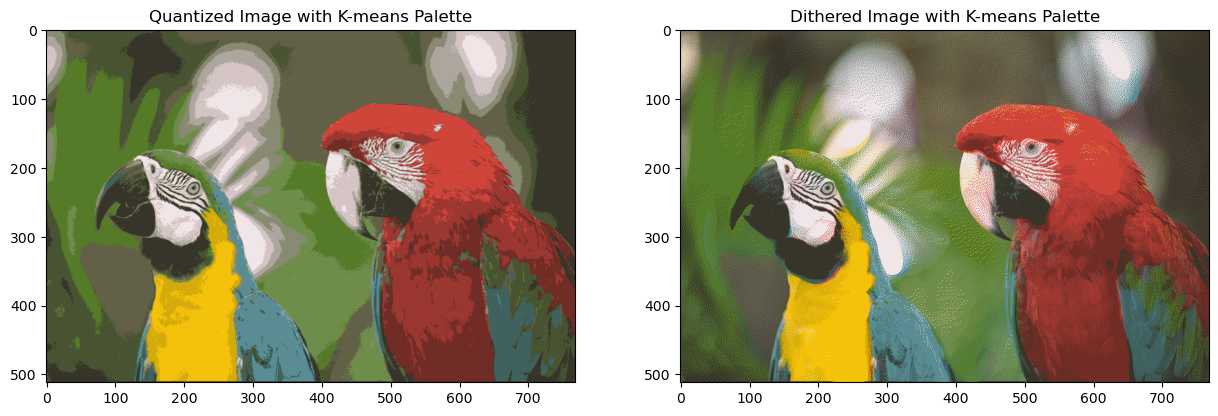

In [117]:
# Show dithered image with k-means palette
plt.subplot(121), plt.imshow(quantized_kmeans.astype(np.uint8))
plt.title('Quantized Image with K-means Palette')
plt.subplot(122), plt.imshow(dithering_kmeans.astype(np.uint8))
plt.title('Dithered Image with K-means Palette')
plt.show()

### 32 Colours

Average Quantization Error for Optimally Quantized Image: 6.611608


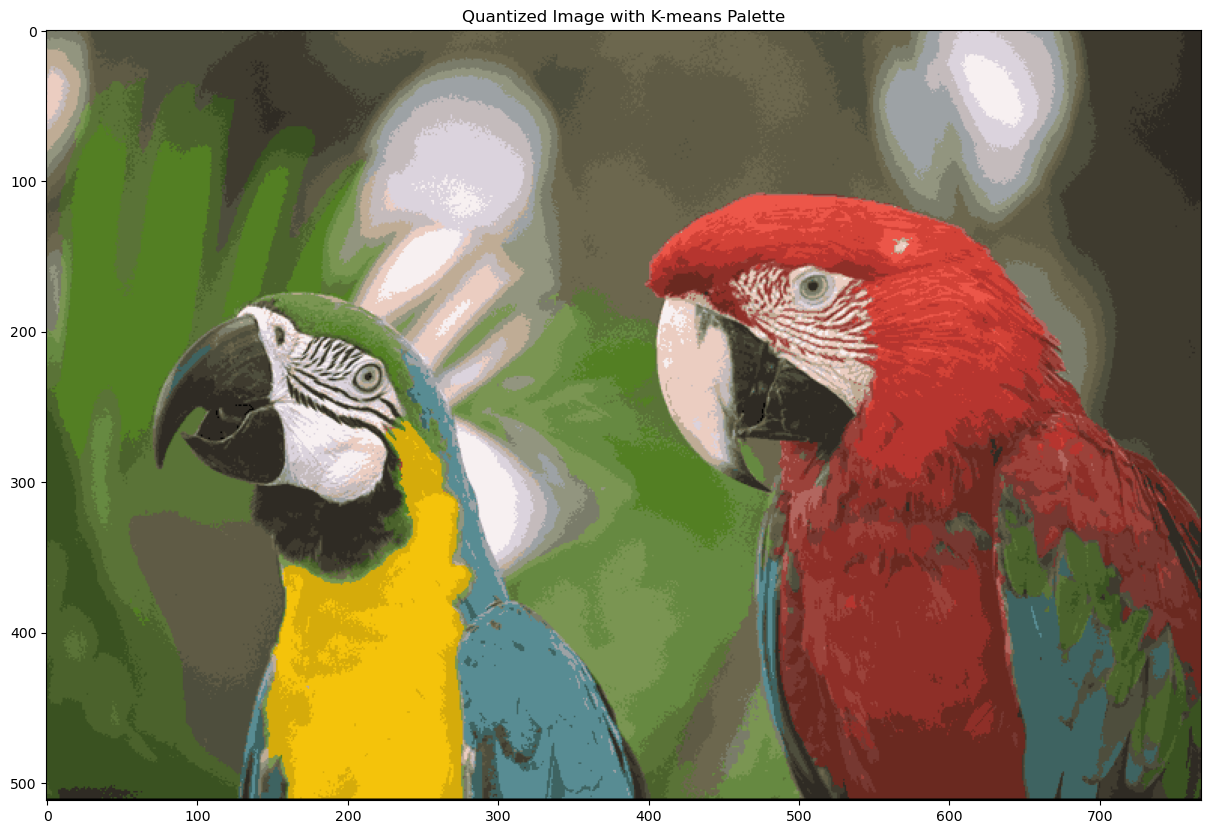

Average Quantization Error for Dithered Image: 13.15196


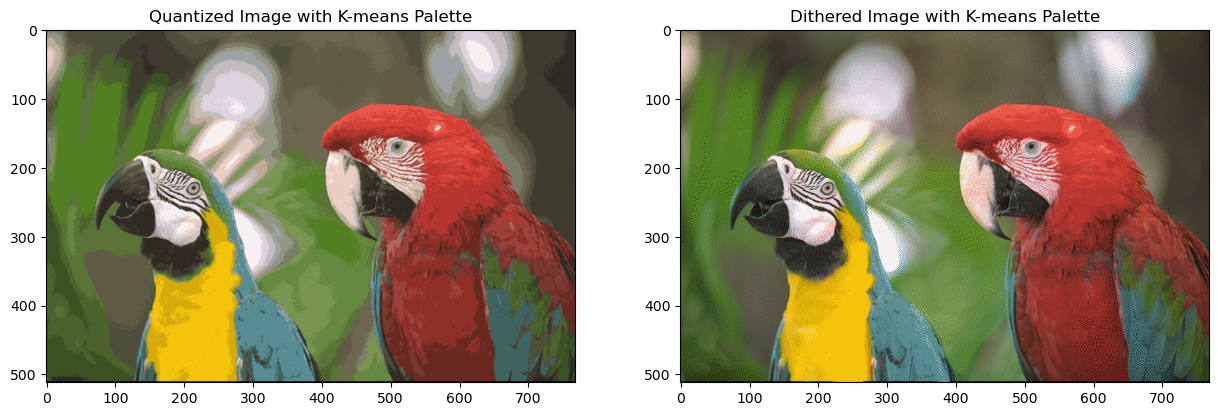

In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=32).fit(np.reshape(img, (-1, 3)))
kMean_colors = kmeans.cluster_centers_

# Using the optimal colour palette from k-means
quantized_kmeans = quantize_image(img, kMean_colors)

# Show quantized image with k-means palette (don't forget to cast back to uint8)
plt.imshow(quantized_kmeans.astype(np.uint8))
plt.title('Quantized Image with K-means Palette')
plt.show()

# Apply Floyd-Steinberg Dithering
dithering_kmeans = floyd_steinberg_dithering(img, kMean_colors)

# Show dithered image with k-means palette
plt.subplot(121), plt.imshow(quantized_kmeans.astype(np.uint8))
plt.title('Quantized Image with K-means Palette')
plt.subplot(122), plt.imshow(dithering_kmeans.astype(np.uint8))
plt.title('Dithered Image with K-means Palette')
plt.show()

### 256 Colours

Average Quantization Error for Optimally Quantized Image: 2.816786


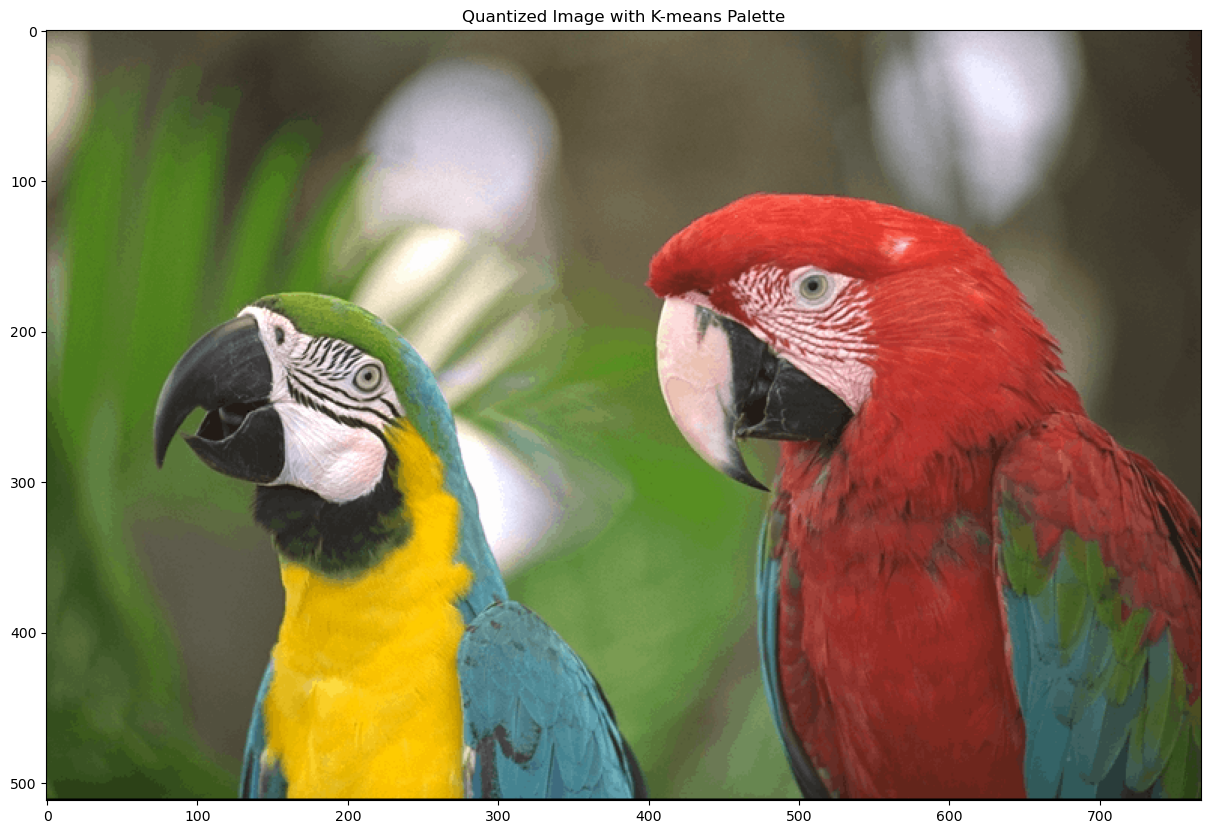

Average Quantization Error for Dithered Image: 4.692577


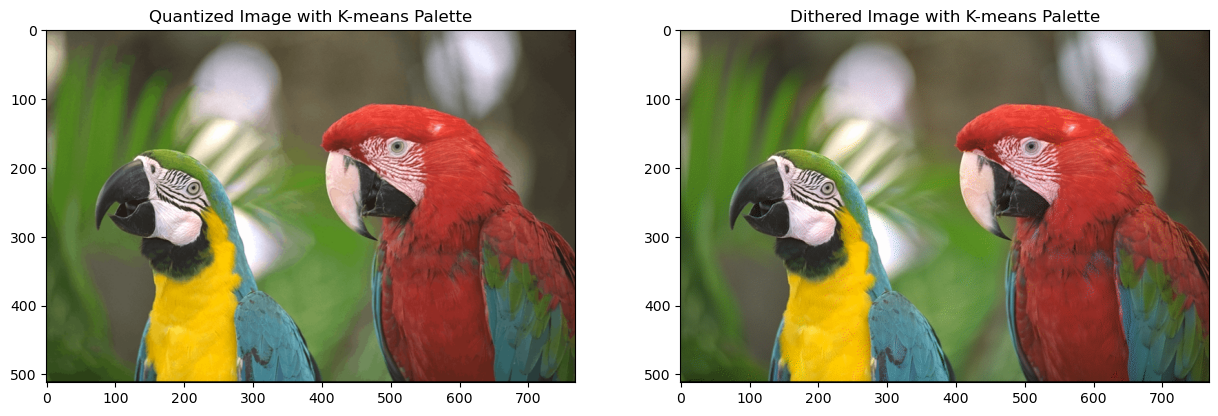

In [124]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=256).fit(np.reshape(img, (-1, 3)))
kMean_colors = kmeans.cluster_centers_

# Using the optimal colour palette from k-means
quantized_kmeans = quantize_image(img, kMean_colors)

# Show quantized image with k-means palette (don't forget to cast back to uint8)
plt.imshow(quantized_kmeans.astype(np.uint8))
plt.title('Quantized Image with K-means Palette')
plt.show()

# Apply Floyd-Steinberg Dithering
dithering_kmeans = floyd_steinberg_dithering(img, kMean_colors)

# Show dithered image with k-means palette
plt.subplot(121), plt.imshow(quantized_kmeans.astype(np.uint8))
plt.title('Quantized Image with K-means Palette')
plt.subplot(122), plt.imshow(dithering_kmeans.astype(np.uint8))
plt.title('Dithered Image with K-means Palette')
plt.show()

* How does the result look like to you?
    * each iteration looks sharper i think
* What happens if we use 32 colours?
    * errors for quantize and dizered quantize are lower:
        * Before (16): quantize = 9.202576, Dizered = 15.980974
        * After (32): quantize = 6.611608, Dizered = 13.15196
* And what happens if we use 256 colours?
    * errors for quantize and dizered quantize are lower:
        * Before (16): quantize = 9.202576, Dizered = 15.980974
        * After (256): quantize = 2.816786, Dizered = 4.692577